<a href="https://colab.research.google.com/github/Krishna-Bhagat/Machine-Learning-Lab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
team01_data = pd.read_excel('/content/Team_22.xlsx')
print(team01_data.head(10))

  Timestamp    Speaker                                         Transcript  \
0  00:00:02  Speaker 1                             One after another, OK.   
1  00:00:05  Speaker 1  OK. We'll start with Ambrette, then go to stru...   
2  00:00:14  Speaker 1                         About what is convolution?   
3  00:00:17  Speaker 2  Sir, convolution is a part of CNN in which the...   
4  00:00:28  Speaker 2  Grid of images or the value of pixels. There i...   
5  00:00:48  Speaker 2                    Particular 3 cross three boxes.   
6  00:00:50  Speaker 2  And then takes the maximum sum of it and then ...   
7  00:01:11  Speaker 2                  Or CNN layer for post processing.   
8  00:01:19  Speaker 1                                                OK.   
9  00:01:23  Speaker 1                            So what is convolution?   

       Label  
0  Statement  
1  Statement  
2   Question  
3     Answer  
4     Answer  
5     Answer  
6     Answer  
7     Answer  
8  Statement  
9 

In [ ]:
team01_data.columns

Index(['Timestamp', 'Speaker', 'Transcript', 'Label'], dtype='object')

In [ ]:
team01_data.isnull().sum()

,0
Timestamp,0
Speaker,0
Transcript,0
Label,0


In [ ]:
statements = team01_data[team01_data['Label'] == 'Statement']
questions = team01_data[team01_data['Label'] == 'Question']
answers = team01_data[team01_data['Label'] == 'Answer']

sentiment_counts = team01_data['Label'].value_counts(normalize=True)

sentiment_counts

,proportion
Label,
Statement,0.417647
Answer,0.358824
Question,0.194118
Clarification,0.029412


In [ ]:
vectorizer = TfidfVectorizer()
X_all = vectorizer.fit_transform(team01_data['Transcript']).toarray()
X_statements = X_all[team01_data['Label'] == 'Statement']
X_questions = X_all[team01_data['Label'] == 'Question']
X_answers = X_all[team01_data['Label'] == 'Answer']

centroid_statements = np.mean(X_statements, axis=0) if len(X_statements) > 0 else np.array([])
centroid_questions = np.mean(X_questions, axis=0) if len(X_questions) > 0 else np.array([])
centroid_answers = np.mean(X_answers, axis=0) if len(X_answers) > 0 else np.array([])


In [ ]:
spread_statements = np.std(X_statements, axis=0) if len(X_statements) > 0 else np.array([])
spread_questions = np.std(X_questions, axis=0) if len(X_questions) > 0 else np.array([])
spread_answers = np.std(X_answers, axis=0) if len(X_answers) > 0 else np.array([])

In [ ]:
distance_statements_questions = np.linalg.norm(centroid_statements - centroid_questions) if centroid_statements.size and centroid_questions.size else None
distance_statements_answers = np.linalg.norm(centroid_statements - centroid_answers) if centroid_statements.size and centroid_answers.size else None
distance_questions_answers = np.linalg.norm(centroid_questions - centroid_answers) if centroid_questions.size and centroid_answers.size else None

In [ ]:
print("Centroid of Statements:", centroid_statements)
print("Centroid of Questions:", centroid_questions)
print("Centroid of Answers:", centroid_answers)

print("Spread of Statements:", spread_statements)
print("Spread of Questions:", spread_questions)
print("Spread of Answers:", spread_answers)

print("Interclass Distance between Statements and Questions:", distance_statements_questions)
print("Interclass Distance between Statements and Answers:", distance_statements_answers)
print("Interclass Distance between Questions and Answers:", distance_questions_answers)

Centroid of Statements: [0.         0.         0.         0.         0.         0.
 0.02364944 0.00849552 0.00477977 0.00307916 0.03521183 0.
 0.00534617 0.         0.         0.00285002 0.02886053 0.
 0.00741474 0.00937256 0.         0.01057801 0.00388943 0.02320566
 0.         0.         0.         0.00726362 0.00511644 0.
 0.00549551 0.00943689 0.         0.         0.01748191 0.01076752
 0.         0.         0.00700335 0.00999052 0.00941095 0.
 0.00501527 0.         0.         0.         0.         0.
 0.00995925 0.01638022 0.         0.         0.01422917 0.00339462
 0.         0.         0.0059451  0.         0.         0.00469452
 0.         0.01065562 0.00495444 0.         0.         0.
 0.         0.         0.         0.         0.00457573 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00832543 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00482251 0.         0.


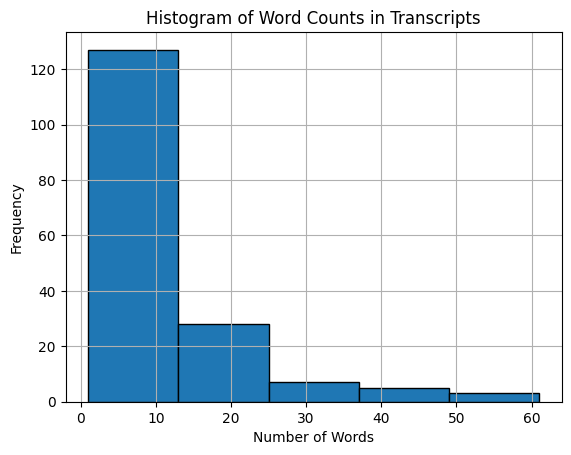

Mean Word Count: 9.976470588235294
Variance of Word Count: 123.81121107266436


In [ ]:
word_counts = [len(transcript.split()) for transcript in team01_data['Transcript']]


hist, bin_edges = np.histogram(word_counts, bins=5)

mean_word_count = np.mean(word_counts)
variance_word_count = np.var(word_counts)

plt.hist(word_counts, bins=5, edgecolor='black')
plt.title('Histogram of Word Counts in Transcripts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


print("Mean Word Count:", mean_word_count)
print("Variance of Word Count:", variance_word_count)


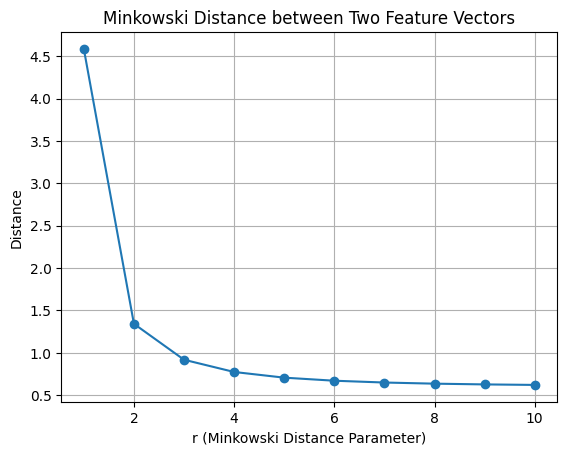

Minkowski Distance (r=1): 4.587396415470932
Minkowski Distance (r=2): 1.3426358242175802
Minkowski Distance (r=3): 0.918628428650696
Minkowski Distance (r=4): 0.7741882038189963
Minkowski Distance (r=5): 0.7071652502646838
Minkowski Distance (r=6): 0.6710188829888583
Minkowski Distance (r=7): 0.6496861888197831
Minkowski Distance (r=8): 0.6362863880277516
Minkowski Distance (r=9): 0.6274598794490679
Minkowski Distance (r=10): 0.6214183034300574


In [ ]:
vector1 = X_all[0]
vector2 = X_all[1]

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

r_values = np.arange(1, 11)
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Minkowski Distance Parameter)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance (r={r}): {dist}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


filtered_data = team01_data[team01_data['Label'].isin(['Statement', 'Question'])]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_data['Transcript']).toarray()

y = np.where(filtered_data['Label'] == 'Statement', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 72 samples
Testing set size: 32 samples


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8125
Confusion Matrix:
[[19  4]
 [ 2  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.64      0.78      0.70         9

    accuracy                           0.81        32
   macro avg       0.77      0.80      0.78        32
weighted avg       0.83      0.81      0.82        32



In [ ]:
# Step 1: Test the accuracy of the kNN classifier using the test set
accuracy = knn.score(X_test, y_test)

print(f"Accuracy of kNN classifier on the test set: {accuracy}")

Accuracy of kNN classifier on the test set: 0.8125


In [ ]:
# Step 1: Predict the class labels for all test vectors
y_pred_all = knn.predict(X_test)

# Output the predicted labels
print("Predicted labels for the test set:")
print(y_pred_all)

# Step 2: Predict the class of a specific test vector
# Select the first vector from the test set as an example
test_vect = X_test[0]
predicted_class = knn.predict([test_vect])

# Output the predicted class for the specific test vector
print(f"Predicted class for the test vector {test_vect}: {predicted_class[0]}")

Predicted labels for the test set:
[1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1]
Predicted class for the test vector [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

Lab-**4**

In [ ]:
vectorizer = TfidfVectorizer() # Initialize TF-IDF Vectorizer

X = vectorizer.fit_transform(team01_data['Transcript']) # Fit and transform the

data_array = X.toarray() # Convert the result into an array

feature_names = vectorizer.get_feature_names_out() # Get the feature names (words)

df = pd.DataFrame(data_array, columns=feature_names)
print(df)

      10    about  achieve  across  actually  advancement  advantages  \
0    0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
1    0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
2    0.0  0.63699      0.0     0.0       0.0          0.0         0.0   
3    0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
4    0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
..   ...      ...      ...     ...       ...          ...         ...   
165  0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
166  0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
167  0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
168  0.0  0.00000      0.0     0.0       0.0          0.0         0.0   
169  0.0  0.00000      0.0     0.0       0.0          0.0         0.0   

        after  all  almost  ...  within  without  wonderful  work  would  \
0    0.603182  0.0     0.0  ...     0.0      0.

In [ ]:
X_statements = data_array[team01_data['Label'] == 'Statement']
X_questions = data_array[team01_data['Label'] == 'Question']
X_answers = data_array[team01_data['Label'] == 'Answer']

In [ ]:
centroid_statements = np.mean(X_statements, axis=0)
centroid_questions = np.mean(X_questions, axis=0)
centroid_answers = np.mean(X_answers, axis=0)

In [ ]:
std_statements = np.std(X_statements, axis=0)
std_questions = np.std(X_questions, axis=0)
std_answers = np.std(X_answers, axis=0)

print(f"Standard Deviation for Statements: {std_statements}")
print(f"Standard Deviation for Questions: {std_questions}")
print(f"Standard Deviation for Answers: {std_answers}")

Standard Deviation for Statements: [0.         0.         0.         0.         0.         0.
 0.09899774 0.07107858 0.03999042 0.02576212 0.15069997 0.
 0.04472925 0.         0.         0.02384497 0.08672277 0.
 0.06203614 0.07841644 0.         0.05151912 0.03254127 0.08602197
 0.         0.         0.         0.06077182 0.0428072  0.
 0.04597876 0.07895465 0.         0.         0.08561781 0.06470885
 0.         0.         0.0585942  0.08358665 0.07873769 0.
 0.02946498 0.         0.         0.         0.         0.
 0.08332507 0.11912341 0.         0.         0.0601865  0.02840145
 0.         0.         0.04974024 0.         0.         0.03927718
 0.         0.06336773 0.04145178 0.         0.         0.
 0.         0.         0.         0.         0.03828332 0.
 0.         0.         0.         0.         0.         0.
 0.         0.06965556 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.040348   0. 

In [ ]:
# Distance between Statements and Questions
distance_statements_questions = np.linalg.norm(centroid_statements - centroid_questions)

# Distance between Statements and Answers
distance_statements_answers = np.linalg.norm(centroid_statements - centroid_answers)

# Distance between Questions and Answers
distance_questions_answers = np.linalg.norm(centroid_questions - centroid_answers)

print(f"Distance between Statements and Questions: {distance_statements_questions}")
print(f"Distance between Statements and Answers: {distance_statements_answers}")
print(f"Distance between Questions and Answers: {distance_questions_answers}")

Distance between Statements and Questions: 0.31063826164597763
Distance between Statements and Answers: 0.2691736122435153
Distance between Questions and Answers: 0.33396819631574454


In [ ]:
feature_index = 16
selected_feature = data_array[:, feature_index]

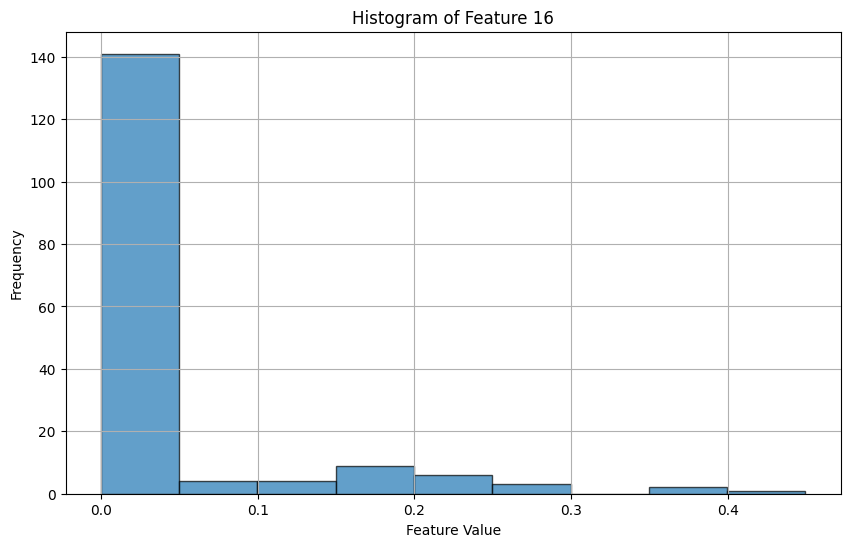

In [ ]:
# Calculate histogram data
hist, bins = np.histogram(selected_feature, bins='auto')  # You can specify the number of bins or use 'auto'

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(selected_feature, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature {}'.format(feature_index))
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the mean and variance of the selected feature
mean = np.mean(selected_feature)
variance = np.var(selected_feature)

print(f"Mean of Feature {feature_index}: {mean:.2f}")
print(f"Variance of Feature {feature_index}: {variance:.2f}")

Mean of Feature 16: 0.03
Variance of Feature 16: 0.01


In [ ]:
# Ensure you have only two classes for this example
data_two_classes = team01_data[team01_data['Label'].isin(['Statement', 'Question'])]

# Prepare features and labels
X = vectorizer.transform(data_two_classes['Transcript'])
y = data_two_classes['Label']

# Convert X to array for consistency with previous code
data_array = X.toarray()

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_array, y, test_size=0.3, random_state=42)

# Print shapes of the resulting datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (72, 434)
X_test shape: (32, 434)
y_train shape: (72,)
y_test shape: (32,)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
neigh.fit(X_train, y_train)

# Optionally, you can check the accuracy on the training set (optional)
train_accuracy = neigh.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.2f}")

Training accuracy: 0.94


In [ ]:
# Assuming the model has already been trained
# Predict classes for the entire test set
predictions = neigh.predict(X_test)

# Print the first few predictions to see how they look
print("Predictions for the test set:", predictions[:10])

# Classify a specific test vector (e.g., the first test vector in the test set)
test_vect = X_test[0]  # You can choose any vector from X_test
predicted_class = neigh.predict([test_vect])

print(f"Class for the test vector: {predicted_class[0]}")

Predictions for the test set: ['Question' 'Statement' 'Statement' 'Statement' 'Statement' 'Statement'
 'Statement' 'Statement' 'Statement' 'Statement']
Class for the test vector: Question


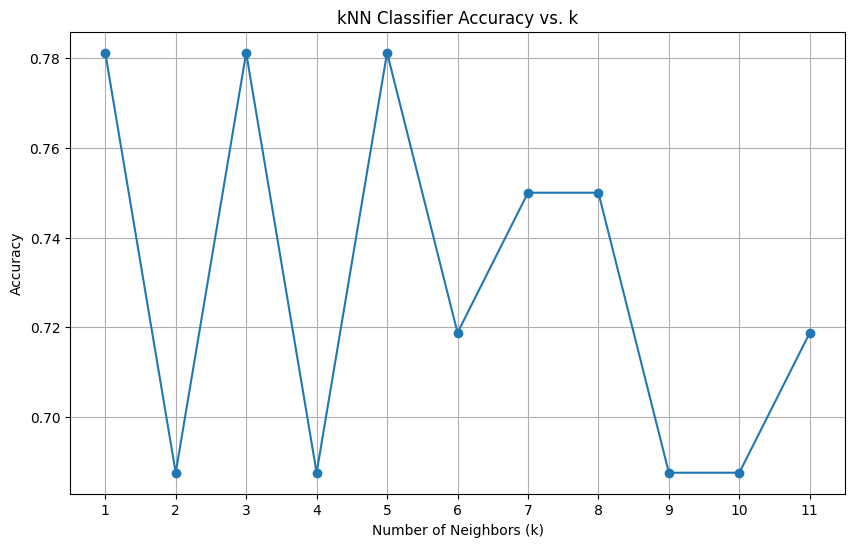

In [ ]:
# Initialize lists to store results
k_values = range(1, 12)  # k from 1 to 11
accuracies = []

# Train and evaluate kNN classifiers for each k
for k in k_values:
    # Initialize the kNN classifier with the current k
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    predictions = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Classifier Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"Confusion Matrix for {dataset_name} Data:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")

# Predict on training data
train_predictions = neigh.predict(X_train)

# Predict on test data
test_predictions = neigh.predict(X_test)

# Evaluate model performance
evaluate_model(y_train, train_predictions, "Training")
evaluate_model(y_test, test_predictions, "Test")

Confusion Matrix for Training Data:
[[21  3]
 [ 1 47]]

Classification Report:
              precision    recall  f1-score   support

    Question       0.95      0.88      0.91        24
   Statement       0.94      0.98      0.96        48

    accuracy                           0.94        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.94      0.94      0.94        72

Accuracy: 0.94
Confusion Matrix for Test Data:
[[ 7  2]
 [ 5 18]]

Classification Report:
              precision    recall  f1-score   support

    Question       0.58      0.78      0.67         9
   Statement       0.90      0.78      0.84        23

    accuracy                           0.78        32
   macro avg       0.74      0.78      0.75        32
weighted avg       0.81      0.78      0.79        32

Accuracy: 0.78


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform train_predictions using the same encoder
train_predictions_encoded = label_encoder.transform(train_predictions)

# Calculate MSE, RMSE, MAPE, and R2 Score using encoded labels
mse = mean_squared_error(y_train_encoded, train_predictions_encoded)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train_encoded, train_predictions_encoded)
r2 = r2_score(y_train_encoded, train_predictions_encoded)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24
Mean Absolute Percentage Error (MAPE): 187649984473770.66
R-squared (R²) Score: 0.75


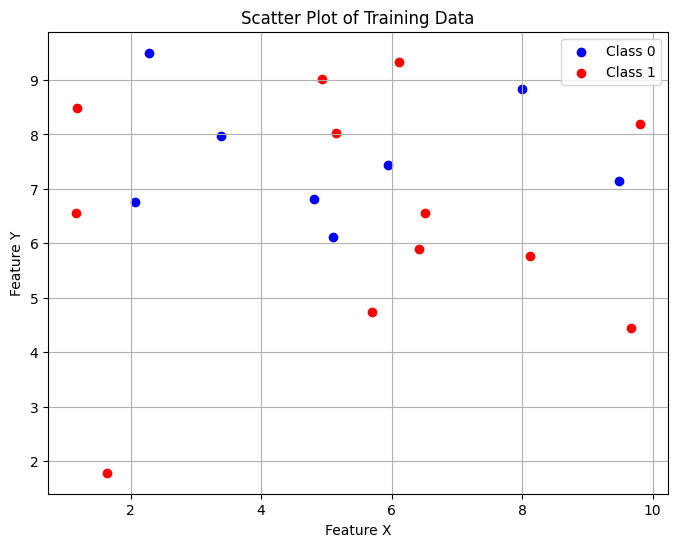

In [ ]:
# Seed for reproducibility
np.random.seed(0)

# Generate 20 random data points for X and Y
X = np.random.uniform(1, 10, size=(20, 2))
# Randomly assign classes: 0 (Blue) or 1 (Red)
y = np.random.choice([0, 1], size=20)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot points for class 0
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')

# Plot points for class 1
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Add labels and title
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


<ipython-input-33-1c28ebbf4c8b>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_classes))


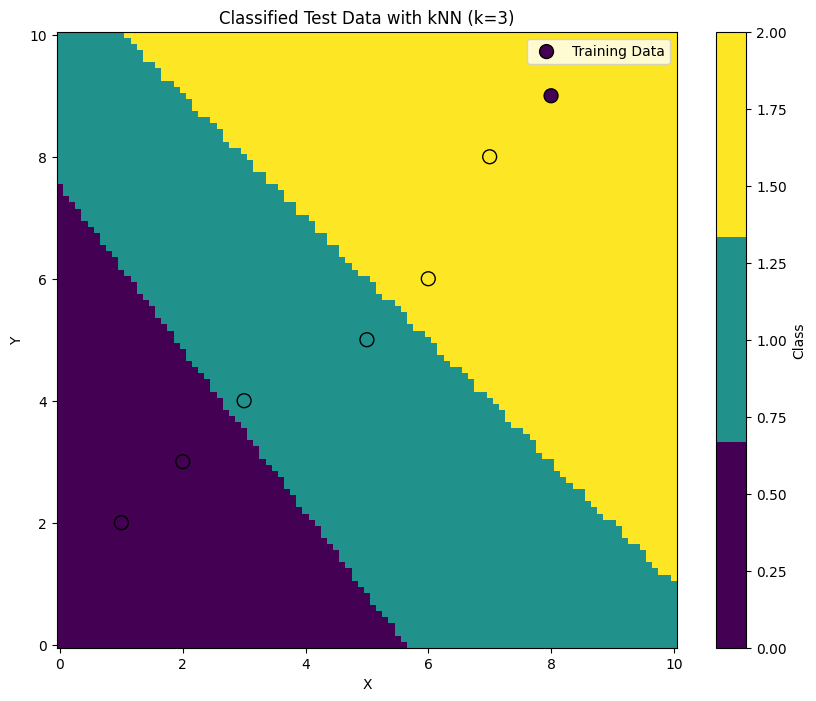

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Example training data (replace with your actual training data)
# Replace these example arrays with your actual feature data and labels
X_train = np.array([
    [1, 2], [2, 3], [3, 4], [5, 5], [6, 6], [7, 8], [8, 9]
])  # Example feature data
y_train = np.array([
    'Class0', 'Class0', 'Class1', 'Class1', 'Class2', 'Class2', 'Class0'
])  # Example labels

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and train the kNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train_encoded)

# Generate test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X, Y = np.meshgrid(x_values, y_values)
test_data = np.c_[X.ravel(), Y.ravel()]

# Classify the test data
predictions_encoded = knn.predict(test_data)

# Reshape predictions to match the grid shape
predicted_classes = predictions_encoded.reshape(X.shape)

# Create a color map for classes
unique_classes = np.unique(predictions_encoded)
cmap = plt.cm.get_cmap('viridis', len(unique_classes))

# Plot the results
plt.figure(figsize=(10, 8))
plt.pcolormesh(X, Y, predicted_classes, shading='auto', cmap=cmap, edgecolors='none')

# Add scatter plot of the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, edgecolor='k', cmap=cmap, marker='o', s=100, label='Training Data')

# Add labels and title
plt.colorbar(label='Class')
plt.title('Classified Test Data with kNN (k=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()

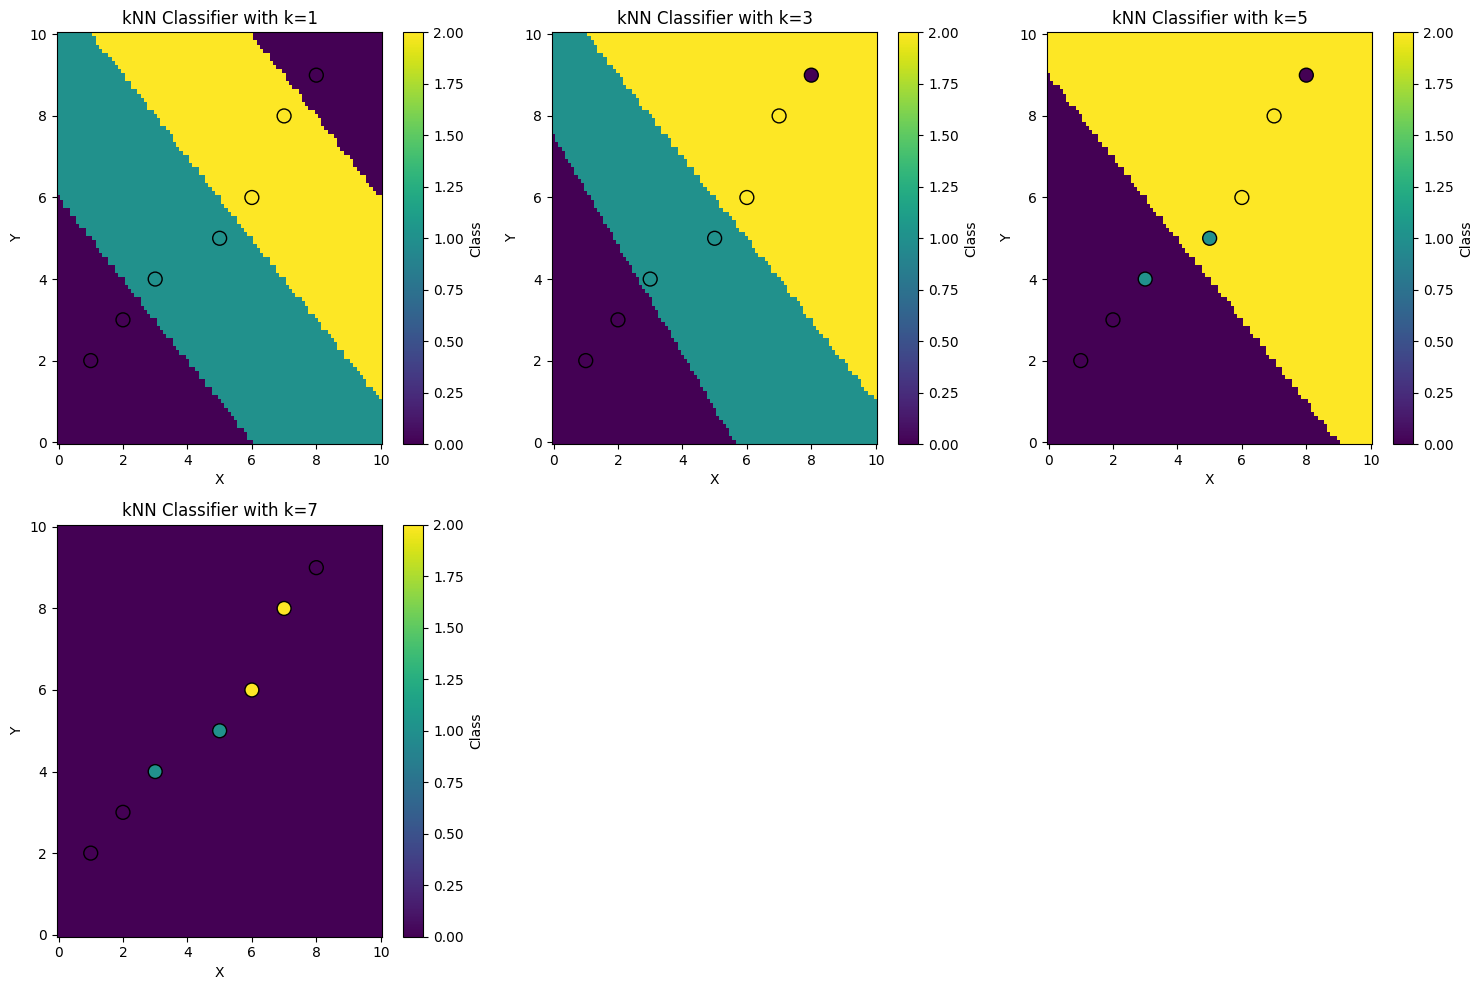

In [ ]:
# Example training data (replace with your actual training data)
X_train = np.array([
    [1, 2], [2, 3], [3, 4], [5, 5], [6, 6], [7, 8], [8, 9]
])  # Example feature data
y_train = np.array([
    'Class0', 'Class0', 'Class1', 'Class1', 'Class2', 'Class2', 'Class0'
])  # Example labels

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Generate test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X, Y = np.meshgrid(x_values, y_values)
test_data = np.c_[X.ravel(), Y.ravel()]

# Define different values of k to evaluate
k_values = [1, 3, 5, 7]

# Create plots for each k
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    # Create and train the kNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_encoded)

    # Classify the test data
    predictions_encoded = knn.predict(test_data)

    # Reshape predictions to match the grid shape
    predicted_classes = predictions_encoded.reshape(X.shape)

    # Create a subplot for the current k
    plt.subplot(2, 3, i)
    plt.pcolormesh(X, Y, predicted_classes, shading='auto', cmap='viridis', edgecolors='none')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, edgecolor='k', cmap='viridis', marker='o', s=100, label='Training Data')
    plt.colorbar(label='Class')
    plt.title(f'kNN Classifier with k={k}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()

Lab - **5**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform train_predictions using the same encoder
train_predictions_encoded = label_encoder.transform(train_predictions)

# Calculate MSE, RMSE, MAPE, and R2 Score using encoded labels
mse = mean_squared_error(y_train_encoded, train_predictions_encoded)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train_encoded, train_predictions_encoded)
r2 = r2_score(y_train_encoded, train_predictions_encoded)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

ValueError: y contains previously unseen labels: 'Statem'